In [1]:
import torch
import polyscope as ps
import igl
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

from compute_volume import get_volume_coords, predict_sdf
from sdfs import SDF_interpolator
from config import DEV

In [2]:
sdf_interpolator = SDF_interpolator()
# visualize_sdf(sdf_interpolator)

from compute_path_opt import compute_path #, compute_path2
from model import Latent2Volume
from config import LATENT_DIM, DEV

checkpoint = torch.load("checkpoints/latent2volume_best.pt", map_location=DEV)
model = Latent2Volume(LATENT_DIM).to(DEV)

# Load the saved state_dict (weights)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

/tmp/ipykernel_2947484/4015345257.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoints/latent2volume_best.pt", map_location=DEV)


Latent2Volume(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.2, inplace=False)
    (10): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [27]:
path = compute_path(torch.tensor([1, 0], dtype=torch.float32), torch.tensor([0, 1], dtype=torch.float32), model, 20,)

print("Path found with length:", len(path))

Path found with length: 21


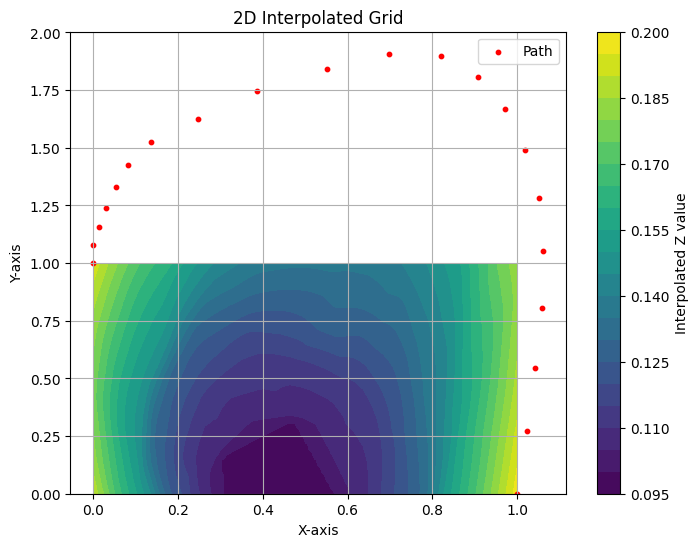

In [28]:
from visualize import visualize_2d_path
visualize_2d_path(model, path)